## TLombardi
### Lesson 6 Homework

- Predict the tree cover type
- Submit a jupyter notebook that uses sklean RandomForestClassifier

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
%matplotlib inline

In [16]:
# Read the downloaded tree cover data. Since there is no header to the data, we will explicitly assign column names.
df = pd.read_csv('Assignment6Data/covtype.data', 
                 delimiter=',',
                 index_col=None,
                 names=['elevation',
                        'aspect',
                        'slope',
                        'horizontal_distance_to_hydrology',
                        'vertical_distance_to_hydrology',
                        'horizontal_distance_to_roadways',
                        'hillshade_9am',
                        'hillshade_noon',
                        'hillshade_3pm',
                        'horizontal_distance_to_fire_points',
                        'wilderness_area_1',
                        'wilderness_area_2',
                        'wilderness_area_3',
                        'wilderness_area_4',
                        'soil_type_1',
                        'soil_type_2',
                        'soil_type_3',
                        'soil_type_4',
                        'soil_type_5',
                        'soil_type_6',
                        'soil_type_7',
                        'soil_type_8',
                        'soil_type_9',
                        'soil_type_10',
                        'soil_type_11',
                        'soil_type_12',
                        'soil_type_13',
                        'soil_type_14',
                        'soil_type_15',
                        'soil_type_16',
                        'soil_type_17',
                        'soil_type_18',
                        'soil_type_19',
                        'soil_type_20',
                        'soil_type_21',
                        'soil_type_22',
                        'soil_type_23',
                        'soil_type_24',
                        'soil_type_25',
                        'soil_type_26',
                        'soil_type_27',
                        'soil_type_28',
                        'soil_type_29',
                        'soil_type_30',
                        'soil_type_31',
                        'soil_type_32',
                        'soil_type_33',
                        'soil_type_34',
                        'soil_type_35',
                        'soil_type_36',
                        'soil_type_37',
                        'soil_type_38',
                        'soil_type_39',
                        'soil_type_40',
                        'cover_type'])

In [17]:
# check for null data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
elevation                             581012 non-null int64
aspect                                581012 non-null int64
slope                                 581012 non-null int64
horizontal_distance_to_hydrology      581012 non-null int64
vertical_distance_to_hydrology        581012 non-null int64
horizontal_distance_to_roadways       581012 non-null int64
hillshade_9am                         581012 non-null int64
hillshade_noon                        581012 non-null int64
hillshade_3pm                         581012 non-null int64
horizontal_distance_to_fire_points    581012 non-null int64
wilderness_area_1                     581012 non-null int64
wilderness_area_2                     581012 non-null int64
wilderness_area_3                     581012 non-null int64
wilderness_area_4                     581012 non-null int64
soil_type_1                           581012 non-

In [18]:
# view dataframe
df.head()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points,...,soil_type_32,soil_type_33,soil_type_34,soil_type_35,soil_type_36,soil_type_37,soil_type_38,soil_type_39,soil_type_40,cover_type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


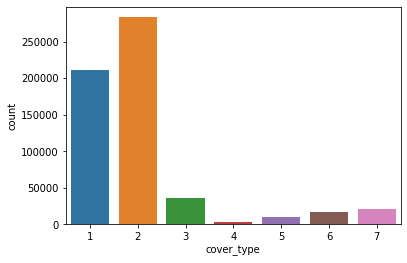

In [19]:
# Plot the covertype
ax = sns.countplot(df["cover_type"])

In [42]:
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(df.drop('cover_type', axis=1),
                                                    df['cover_type'],
                                                    test_size=0.3, 
                                                    random_state=42)

In [43]:
# train the model
rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1, verbose=1)
rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  6.2min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=1,
                      warm_start=False)

In [44]:
# make predictions
y_pred = rf.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    2.4s finished


In [45]:
# get r2 value
r2_score(y_pred=y_pred,y_true=y_test)

0.9234451751095756

In [48]:
# display dataframe of feature importances in random forest regressor
pd.DataFrame(rf.feature_importances_,
             index=X_train.columns, 
             columns=['Importance']).sort_values(by='Importance', 
                                                 ascending=False)[:10]

,Importance
elevation,0.334083
horizontal_distance_to_fire_points,0.136344
horizontal_distance_to_roadways,0.131354
horizontal_distance_to_hydrology,0.046430
vertical_distance_to_hydrology,0.044228
wilderness_area_3,0.042771
soil_type_32,0.034943
aspect,0.029724
hillshade_9am,0.027086
hillshade_3pm,0.026773
